In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

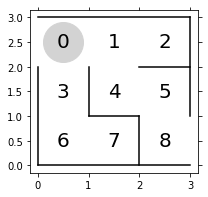

In [6]:
fig = plt.figure(figsize=(3, 3))

# 壁
plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

# 数字
for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')

# 円
circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

# 目盛りと枠の非表示
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')


In [10]:
# パラメータθの初期値の準備
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],  # 0 上,右,下,左
    [np.nan, 1, 1, 1],  # 1
    [np.nan, np.nan, np.nan, 1],  # 2
    [1, np.nan, 1, np.nan],  # 3
    [1, 1, np.nan, np.nan],  # 4
    [np.nan, np.nan, 1, 1],  # 5
    [1, 1, np.nan, np.nan],  # 6
    [np.nan, np.nan, np.nan, 1]])  # 7

print(theta_0)

[[nan  1.  1. nan]
 [nan  1.  1.  1.]
 [nan nan nan  1.]
 [ 1. nan  1. nan]
 [ 1.  1. nan nan]
 [nan nan  1.  1.]
 [ 1.  1. nan nan]
 [nan nan nan  1.]]


In [8]:
def get_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(theta)
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :]/np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi)
    return pi


In [9]:
pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [11]:
def get_a(pi, s):
    return np.random.choice([0,1,2,3], p=pi[s])

In [12]:
def get_s_next(s, a):
    if a == 0:
        return s-3
    elif a == 1:
        return s+1
    elif a == 2:
        return s+3
    elif a == 3:
        return s-1


In [13]:
def play(pi):
    s = 0
    s_a_history = [[0, np.nan]]

    while True:
        a = get_a(pi, s)
        s_next = get_s_next(s, a)

        s_a_history[-1][1]=a
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            break
        else:
            s = s_next
    return s_a_history

In [ ]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    total = len(s_a_history)-1
    [s_count, a_count] = theta.shape
    
    delta_theta = theta.copy()
    for i in range(0,s_count):
        for j in range(0, a_count):
            if not(np.isnan(theta[i,j])):
                sa_ij = [sa for sa in s_a_history if sa == [i,j]]
                n